In [6]:
import os,sys
os.getcwd()
import numpy as np
from scipy.interpolate import interp1d,splrep,splev
from scipy.integrate import quad, odeint
from matplotlib import pyplot as plt
from Thermal_Boltzmann_Solver import Boltzmann_solver
from Thermal_Monte_Carlo import I4

In [38]:
#Run the TMC code to get enough sample for collision terms. See page for Thermal_Monte_Carlo for details.
mX = 1e4
m1=mX /2
m1,m2,m3,m4=m1,m1,0.0,0.0
MeV=1.0;
GeV=1e3*MeV;
TeV=1e3*GeV
def F_III_2(E1,E2,E3,dot12,dot13,dot23):
    global T1,m1,mX
    mB=mX
    mF=m1
    f1=1/(np.exp(E1/T1)+1) #FD statistics
    f2=1/(np.exp(E2/T1)+1) #FD statistics
    f3=0 #nuR
    f4=0 #nuR
    t=m3**2+m1**2-2*dot13
    return E3*f1*f2*(1-f3)*(1-f4)*(t-mF**2)**2/(t-mB**2)**2

iii=I4()
iii.m1234=(m1,m2,m3,m4)
iii.n=1000000
iii.F=F_III_2
#which requires global T1, m1,mX

T1list=mX/2 * np.logspace(-2,1,40)
results=[]

for i,T1 in enumerate(T1list):
    print ("\r m1=",m1,"i=",i,"/",len(T1list),end=",")    
    iii.Tqx=4*T1
    iii.T2x=4*T1 
    iii.generate()
    results.append(iii.go())

 m1= 5000.0 i= 0 / 40,

 m1= 5000.0 i= 1 / 40,

 m1= 5000.0 i= 2 / 40,

 m1= 5000.0 i= 3 / 40,

 m1= 5000.0 i= 4 / 40,

 m1= 5000.0 i= 5 / 40,

 m1= 5000.0 i= 6 / 40,

 m1= 5000.0 i= 7 / 40,

 m1= 5000.0 i= 8 / 40,

 m1= 5000.0 i= 9 / 40,

 m1= 5000.0 i= 10 / 40,

 m1= 5000.0 i= 11 / 40,

 m1= 5000.0 i= 12 / 40,

 m1= 5000.0 i= 13 / 40,

 m1= 5000.0 i= 14 / 40,

 m1= 5000.0 i= 15 / 40,

 m1= 5000.0 i= 16 / 40,

 m1= 5000.0 i= 17 / 40,

 m1= 5000.0 i= 18 / 40,

 m1= 5000.0 i= 19 / 40,

 m1= 5000.0 i= 20 / 40,

 m1= 5000.0 i= 21 / 40,

 m1= 5000.0 i= 22 / 40,

 m1= 5000.0 i= 23 / 40,

 m1= 5000.0 i= 24 / 40,

 m1= 5000.0 i= 25 / 40,

 m1= 5000.0 i= 26 / 40,

 m1= 5000.0 i= 27 / 40,

 m1= 5000.0 i= 28 / 40,

 m1= 5000.0 i= 29 / 40,

 m1= 5000.0 i= 30 / 40,

 m1= 5000.0 i= 31 / 40,

 m1= 5000.0 i= 32 / 40,

 m1= 5000.0 i= 33 / 40,

 m1= 5000.0 i= 34 / 40,

 m1= 5000.0 i= 35 / 40,

 m1= 5000.0 i= 36 / 40,

 m1= 5000.0 i= 37 / 40,

 m1= 5000.0 i= 38 / 40,

 m1= 5000.0 i= 39 / 40,

In [56]:
#define the collision term as a function of temperature of two particles
CvR_MC_data = np.array([T1list,results])
CvR_MC_fun = interp1d(np.log10(CvR_MC_data[0]), np.log10(CvR_MC_data[1]))
gggg = (1e-4)**4
NvR = 6
def Ce_vR_T_anni_MC(T_SM):
    global gggg
    Tmax = CvR_MC_data[0, -1]
    Tmin = CvR_MC_data[0, 0]
    if T_SM < Tmin:
        return NvR * gggg * CvR_MC_data[1, 0] * (T_SM / Tmin) ** 9
    elif T_SM > Tmax:
        # accoding to Eq.(xxx), in this case it is proportional to T^5
        return NvR * gggg * CvR_MC_data[1, -1] * (T_SM / Tmax) ** 5
    else:
        return NvR * gggg * 10 ** CvR_MC_fun(np.log10(T_SM))
def Ce_vR_TT_anni_MC(T_SM, T_vR):
    return Ce_vR_T_anni_MC(T_SM) - Ce_vR_T_anni_MC(T_vR)

In [57]:
#Initiate solver by setting the collision term.
A = Boltzmann_solver(Cp=Ce_vR_TT_anni_MC)
#then solve the equation based for initial condition.
A.solve(T0=[1e7, 1e3], Tf=1e1, num=1e3)
#results are restored in save variable
result = A.save[0]
Neff = (result["TT_curve"](10) / 10) ** 4 * 3

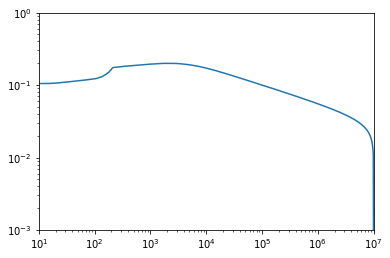

In [58]:
#read the results
plt.plot(result["T_solve"][:,0],result["T_solve"][:,1]/result["T_solve"][:,0])
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-3,1)
plt.xlim(10,1e7)
plt.show()

xxxxxxx


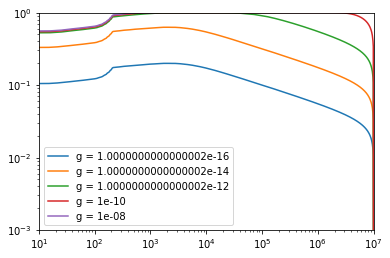

In [63]:
g_anni_scan = np.logspace(-4,-2,5)
for j, gscan in enumerate(g_anni_scan):
    gggg=  gscan**4
    A = Boltzmann_solver(Cp=Ce_vR_TT_anni_MC)
    A.solve(T0=[1e7, 1e3], Tf=1e1, num=1e3)
    result = A.save[0]
    plt.plot(result["T_solve"][:,0],result["T_solve"][:,1]/result["T_solve"][:,0],label = "g = " + str(gggg))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-3,1)
plt.xlim(10,1e7)
plt.legend()
plt.show()